#### Random Sample Imputation
Aim: Random sample imputation consist of taking random observation from the dataset and we use this observation to replace the NaN values.

When should be use:
> It assme that the data are missing completly at random (MCAR).

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = pd.read_csv('datasets/titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [9]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0) # replacing NaN values through random values

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [17]:
def imput_nan(df,var,median):
    df[var+'_median'] = df[var].fillna(median)
    df[var+'_random'] = df[var]
    random_sample = df[var].dropna().sample(df[var].isnull().sum(),random_state=0)
    random_sample.index = df[df[var].isnull()].index
    df.loc[df[var].isnull(), var+'_random'] = random_sample

In [13]:
median = df['Age'].median()
median

28.0

In [18]:
imput_nan(df,'Age',median)

In [19]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


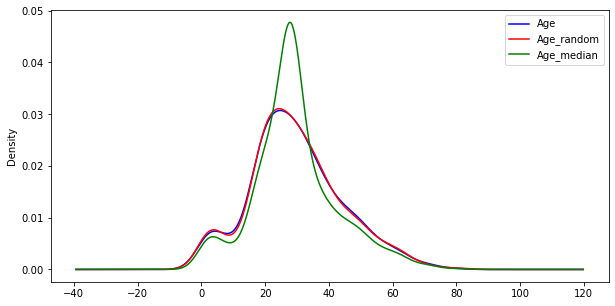

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
ax = df['Age'].plot(kind='kde', color='blue')
df['Age_random'].plot(kind='kde', ax=ax, color='red')
df['Age_median'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')
plt.show()